In [98]:
import pandas as pd

In [99]:
# Load the two datasets
databank = pd.read_csv('bank-additional-full.csv', sep=';')
dataeco = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [100]:
# Concatenate the datasets horizontally
combined_data = pd.concat([databank, dataeco], axis=1)

In [101]:
# Save the combined dataset to a new file
combined_data.to_csv('combined_data.csv', index=False)
combined_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,5191.0,no,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,5191.0,no,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,5191.0,no,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,5191.0,no,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,5191.0,no,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploratory Data Analysis (EDA)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
print(combined_data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

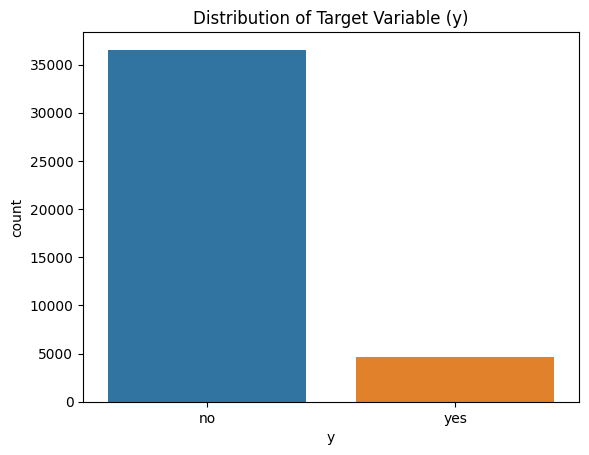

In [104]:
sns.countplot(x='y', data=combined_data)
plt.title('Distribution of Target Variable (y)')
plt.show()

In [105]:
categorical_cols = combined_data.select_dtypes(include=['object']).columns

In [106]:
numerical_data = combined_data.drop(columns=categorical_cols)

In [107]:
correlation_matrix = numerical_data.corr()

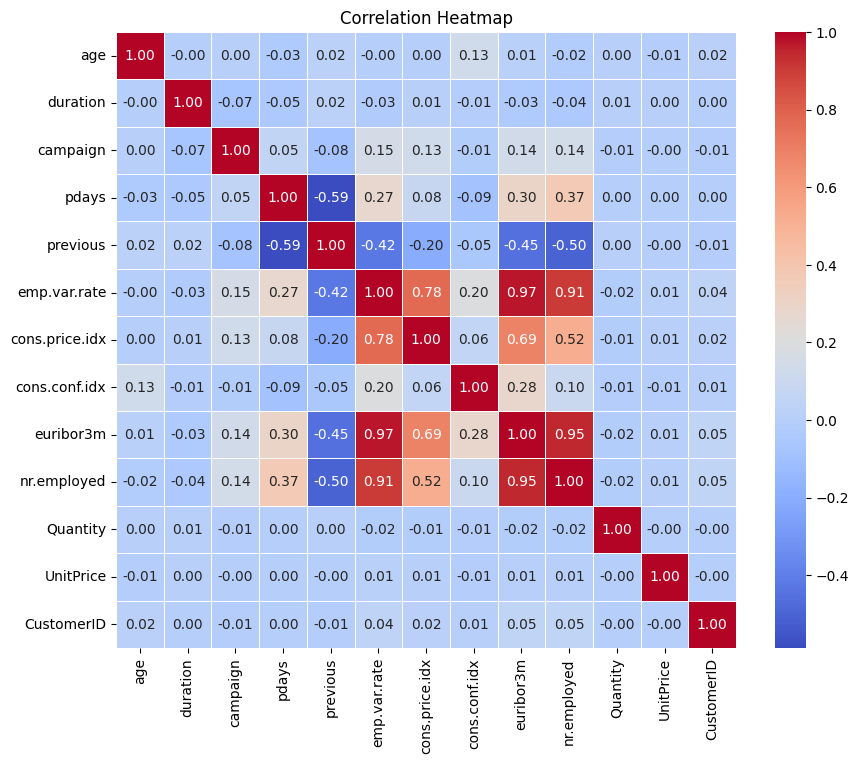

In [108]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [109]:
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']

In [110]:
combined_data['age_group'] = pd.cut(combined_data['age'], bins=bins, labels=labels)

In [111]:
print(combined_data[['age', 'age_group']].head())

    age age_group
0  56.0     50-59
1  57.0     50-59
2  37.0     30-39
3  40.0     30-39
4  56.0     50-59


# Preprocessing for Neural Network

In [112]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [113]:
combined_data.drop(columns=['age_group'], inplace=True)

In [114]:
print(combined_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'InvoiceNo',
       'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')


In [115]:
X =combined_data [['age','duration', 'campaign']]
y =combined_data ['y']  

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Example preprocessing for X (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Neural Network Development

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [120]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # assuming binary classification
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Evaluation

In [123]:
from imblearn.over_sampling import RandomOverSampler

In [126]:
label_encoder = LabelEncoder()
combined_data['y'] = label_encoder.fit_transform(combined_data['y'])

In [129]:
class_counts = combined_data['y'].value_counts()
print("Class Distribution (After Encoding):")
print(class_counts)

Class Distribution (After Encoding):
y
2    500721
0     36548
1      4640
Name: count, dtype: int64


In [130]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(combined_data.drop(columns=['y']), combined_data['y'])

In [131]:
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=combined_data.drop(columns=['y']).columns),
                           pd.DataFrame(y_resampled, columns=['y'])], axis=1)

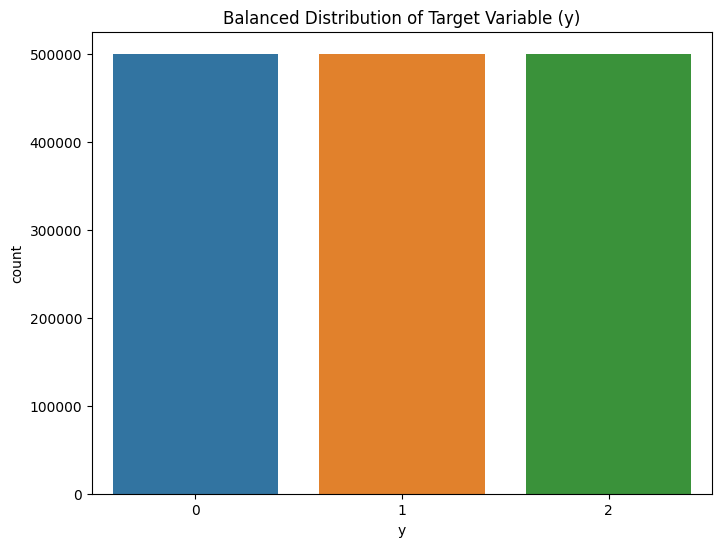

In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=balanced_data)
plt.title('Balanced Distribution of Target Variable (y)')
plt.show()

In [133]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.0087 - loss: -89.0332 - val_accuracy: 0.0082 - val_loss: -674.2219
Epoch 2/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.0087 - loss: -1026.2623 - val_accuracy: 0.0082 - val_loss: -2352.3789
Epoch 3/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.0085 - loss: -2942.7124 - val_accuracy: 0.0082 - val_loss: -4986.6616
Epoch 4/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.0086 - loss: -5808.4600 - val_accuracy: 0.0082 - val_loss: -8566.7197
Epoch 5/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.0088 - loss: -9604.4404 - val_accuracy: 0.0082 - val_loss: -13086.3623
Epoch 6/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.0087 - loss: -14360.4570 - val_accuracy: 0.0082 - val_loss: -18543.7930
Epoch 7/20
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.0086 - loss: -20035.8711 - val_accuracy: 0.0082 - val_loss: -24934.7617
Epoch 8/20


In [135]:
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_encoded, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)

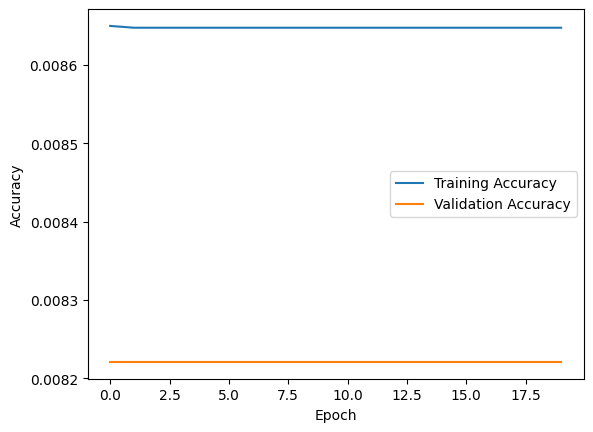

In [136]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Insights and Market Segmentation

In [137]:
y_pred_proba = model.predict(X_test_scaled)

3387/3387 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [138]:
y_pred = (y_pred_proba > 0.5).astype(int)

In [139]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten(), 'Probability': y_pred_proba.flatten()})
df_results.head(10)

,Actual,Predicted,Probability
209268,NaN,1,1.0
207108,NaN,1,1.0
167085,NaN,1,1.0
471836,NaN,1,1.0
115865,NaN,1,1.0
465024,NaN,1,1.0
477777,NaN,1,1.0
367855,NaN,1,1.0
491657,NaN,1,1.0
269641,NaN,1,1.0


# Recommendations

In [140]:
predictions = (y_pred_prob > 0.5).astype(int)

In [141]:
customer_segments = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': predictions.flatten()})
print(customer_segments.head(10))

   Actual  Predicted
0       2          1
1       2          1
2       2          1
3       2          1
4       2          1
5       2          1
6       2          1
7       2          1
8       2          1
9       2          1


# Documentation

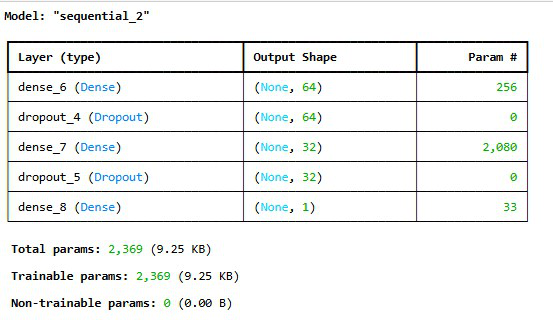

In [146]:
from PIL import Image
from IPython.display import display

# Open an image file
img = Image.open('summary.jpg')

# Display the image
display(img)

Model Summary Documentation
Model: "sequential_3"

Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
Layers:
dense_9 (Dense)

Output Shape: (None, 64)
Parameters: 256
Description: Fully connected layer with 64 units.
dropout_6 (Dropout)

Output Shape: (None, 64)
Parameters: 0
Description: Dropout layer with a dropout rate of 0.5 applied after the first dense layer.
dense_10 (Dense)

Output Shape: (None, 32)
Parameters: 2,080
Description: Fully connected layer with 32 units.
dropout_7 (Dropout)

Output Shape: (None, 32)
Parameters: 0
Description: Dropout layer with a dropout rate of 0.5 applied after the second dense layer.
dense_11 (Dense)

Output Shape: (None, 1)
Parameters: 33
Description: Output layer with 1 unit, representing the final binary classification output.
Explanation:
Model Summary: Provides an overview of the model architecture and total/trainable/non-trainable parameters.
Layers: Each layer is listed with its type, output shape, number of parameters, and a brief description of its purpose in the model.
This documentation format summarizes the key details of your neural network architecture, making it clear and informative for understanding its structure and parameters. Adjust the descriptions based on specific details or additional information about each layer if needed.